<a href="https://colab.research.google.com/github/RadhikaRM/Mobilepricerangeprediction/blob/main/Pricerangeprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the competitive mobile phone market companies want 
to ***understand sales data of mobile phones and factors which drive the prices.*** The objective is to f*ind out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price*. 
In this problem, we do not have to predict the actual price but a price range indicating how high the price is. 

# ***Data Description***

* Battery_power - Total energy a battery can store in one time measured in mAh 
* **Blue - Has bluetooth or not**
* Clock_speed - speed at which microprocessor executes instructions 
* **Dual_sim - Has dual sim support or not**
* Fc - Front Camera mega pixels 
* **Four_g - Has 4G or not**
* Int_memory - Internal Memory in Gigabytes 
* M_dep - Mobile Depth in cm 
* Mobile_wt - Weight of mobile phone 
* N_cores - Number of cores of processor 
* Pc - Primary Camera mega pixels 
* Px_height - Pixel Resolution Height 
* Px_width - Pixel Resolution Width 
* Ram - Random Access Memory in Mega Bytes 
* Sc_h - Screen Height of mobile in cm 
* Sc_w - Screen Width of mobile in cm 
* Talk_time - longest time that a single battery charge will last when you are
* **Three_g - Has 3G or not** 
* **Touch_screen - Has touch screen or not** 
* **Wifi - Has wifi or not** 
* **Price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).**

# ***Importing the data***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Almabetter/Mobile_price_prediction/data_mobile_price_range.csv")

In [ ]:
#diplaying the first 3 rows
df.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

The dataset has 2000 rows and 21 columns.None of the columns contain null values

In [ ]:
#Checking for duplicates
df[df.duplicated()]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [ ]:
#Number of unique elements in each column
for col in df.columns:
  print(f'{col} has {df[col].nunique()} unique elements and they are:\n {df[col].unique()}')

battery_power has 1094 unique elements and they are:
 [ 842 1021  563 ... 1139 1467  858]
blue has 2 unique elements and they are:
 [0 1]
clock_speed has 26 unique elements and they are:
 [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
dual_sim has 2 unique elements and they are:
 [0 1]
fc has 20 unique elements and they are:
 [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
four_g has 2 unique elements and they are:
 [0 1]
int_memory has 63 unique elements and they are:
 [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
m_dep has 10 unique elements and they are:
 [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
mobile_wt has 121 unique elements and they are:
 [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 1

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [ ]:
len(df[df['sc_w']==0.0])

180

In [ ]:
df[df['px_height']==0.0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7,1,40,0.1,99,4,...,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,...,0,994,1958,7,5,7,1,1,0,1


The data contains 180 mobiles with zero screen width,this is not possible in real.

In [ ]:
#creating list of numerical and categorical columns for the dataframe 'df'
numerical_columns=[]
for col in df.columns:
  if df[col].nunique()>5:
    numerical_columns.append(col)
categorical_columns=list(set(df.columns)-set(numerical_columns))

In [ ]:
print(f'The numerical columns are {numerical_columns}\n Categorical columns are : {categorical_columns}')

The numerical columns are ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
 Categorical columns are : ['price_range', 'touch_screen', 'blue', 'wifi', 'four_g', 'three_g', 'dual_sim']


# ***Univariate analysis***

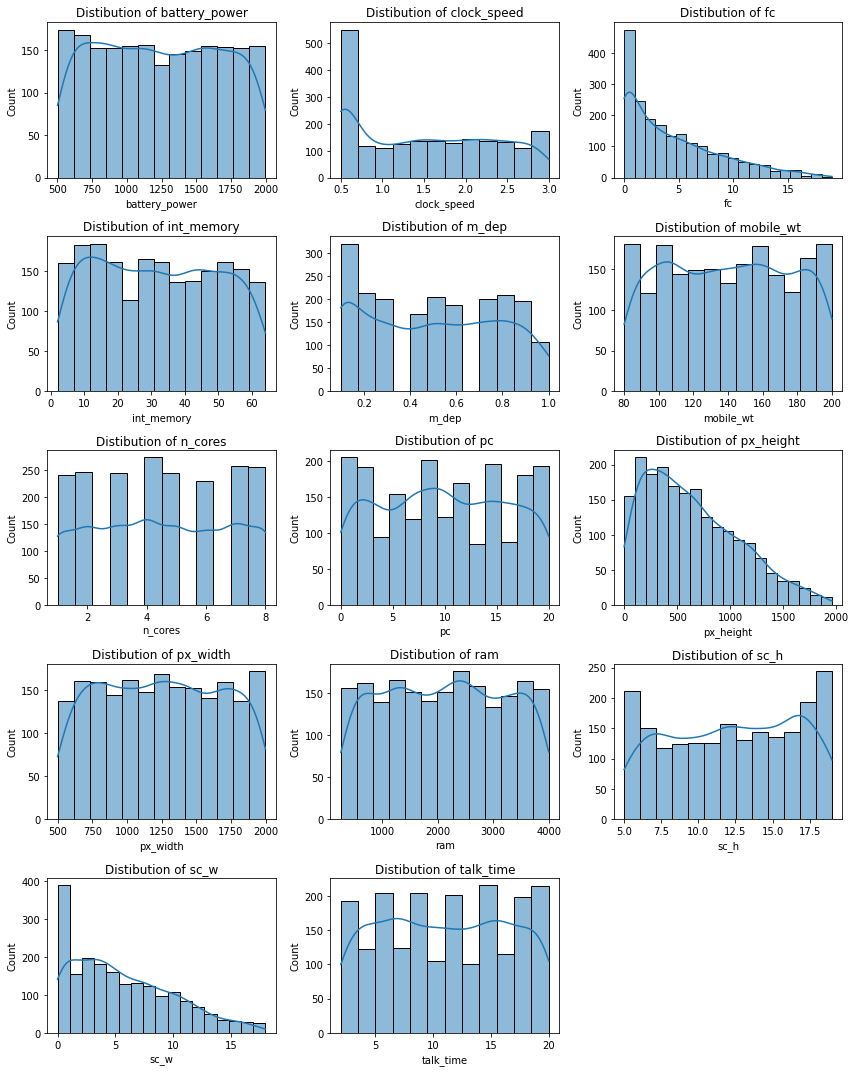

In [ ]:
fig = plt.figure(figsize=(12,15))
c=1
for i in numerical_columns:
  plt.subplot(5,3, c)
  sns.histplot(df[i],kde=True)
  plt.title('Distibution of {}'.format(i))
  c+=1
plt.tight_layout()  

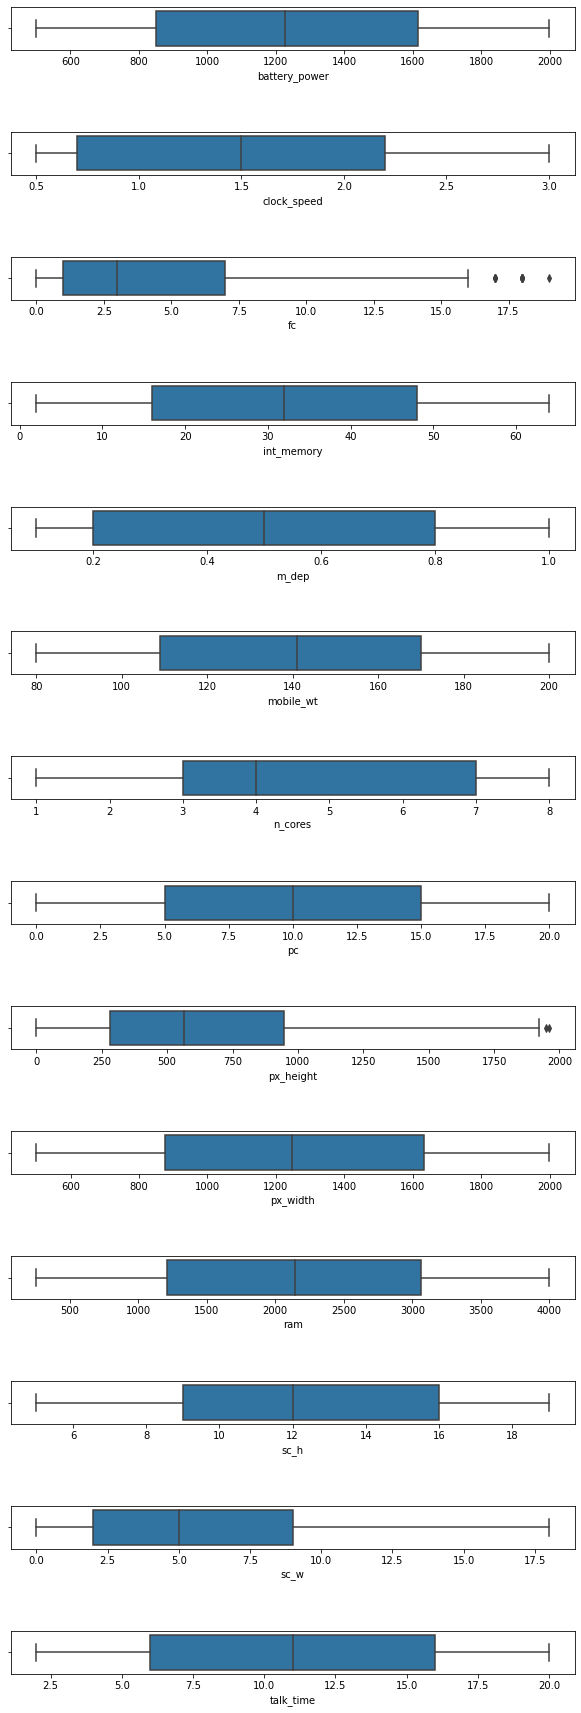

In [ ]:
#Checking for outliers

fig = plt.figure(figsize=(8,25))
c=1
for i in numerical_columns :
    plt.subplot(15,1, c)
    plt.xlabel('Distibution of {}'.format(i))
    sns.boxplot(x=i,data=df)
    c = c + 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

The numerical columns do not have values which are extreme and unusual

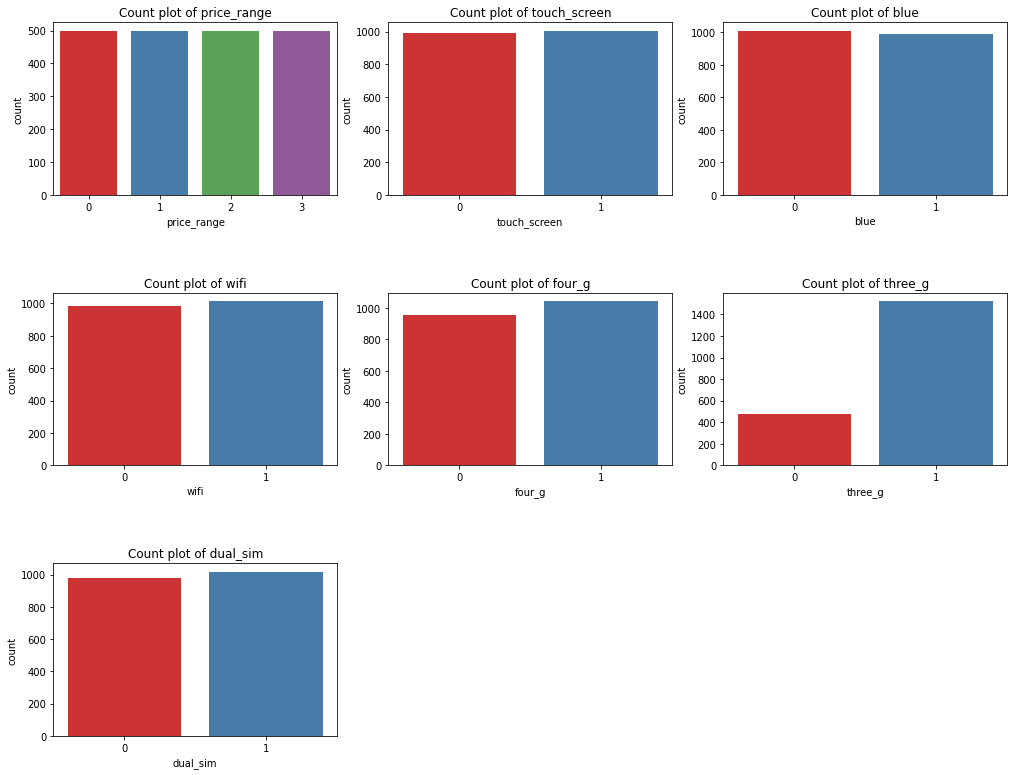

In [ ]:
#Count plot of categorical columns
#Checking for outliers

fig = plt.figure(figsize=(14,14))
c=1
for i in categorical_columns :
    plt.subplot(4,3, c)
    sns.countplot(x=i,data=df,palette='Set1')
    plt.title('Count plot of {}'.format(i))
    c = c + 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


* Most of the phones currently available in the market  have 3G support
* There is a similar count of records for phones belonging to all price ranges in the given data.

Text(0, 0.5, 'Number of phones')

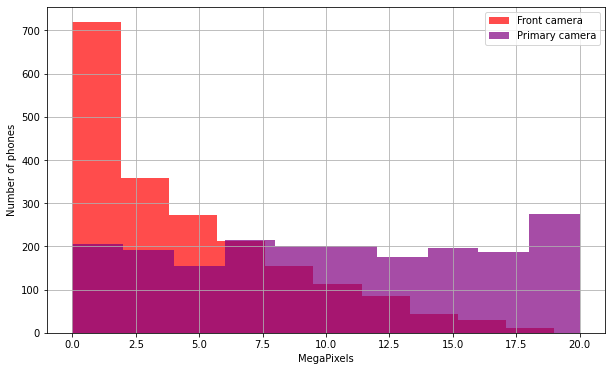

In [ ]:
plt.figure(figsize=(10,6))
df['fc'].hist(alpha=0.7,color='Red',label='Front camera')
df['pc'].hist(alpha=0.7,color='Purple',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')
plt.ylabel('Number of phones')

*  Front cameras present in majority of phones have poor quality(below 2.5 MP)

# ***Bivariate and Multivariate analysis***

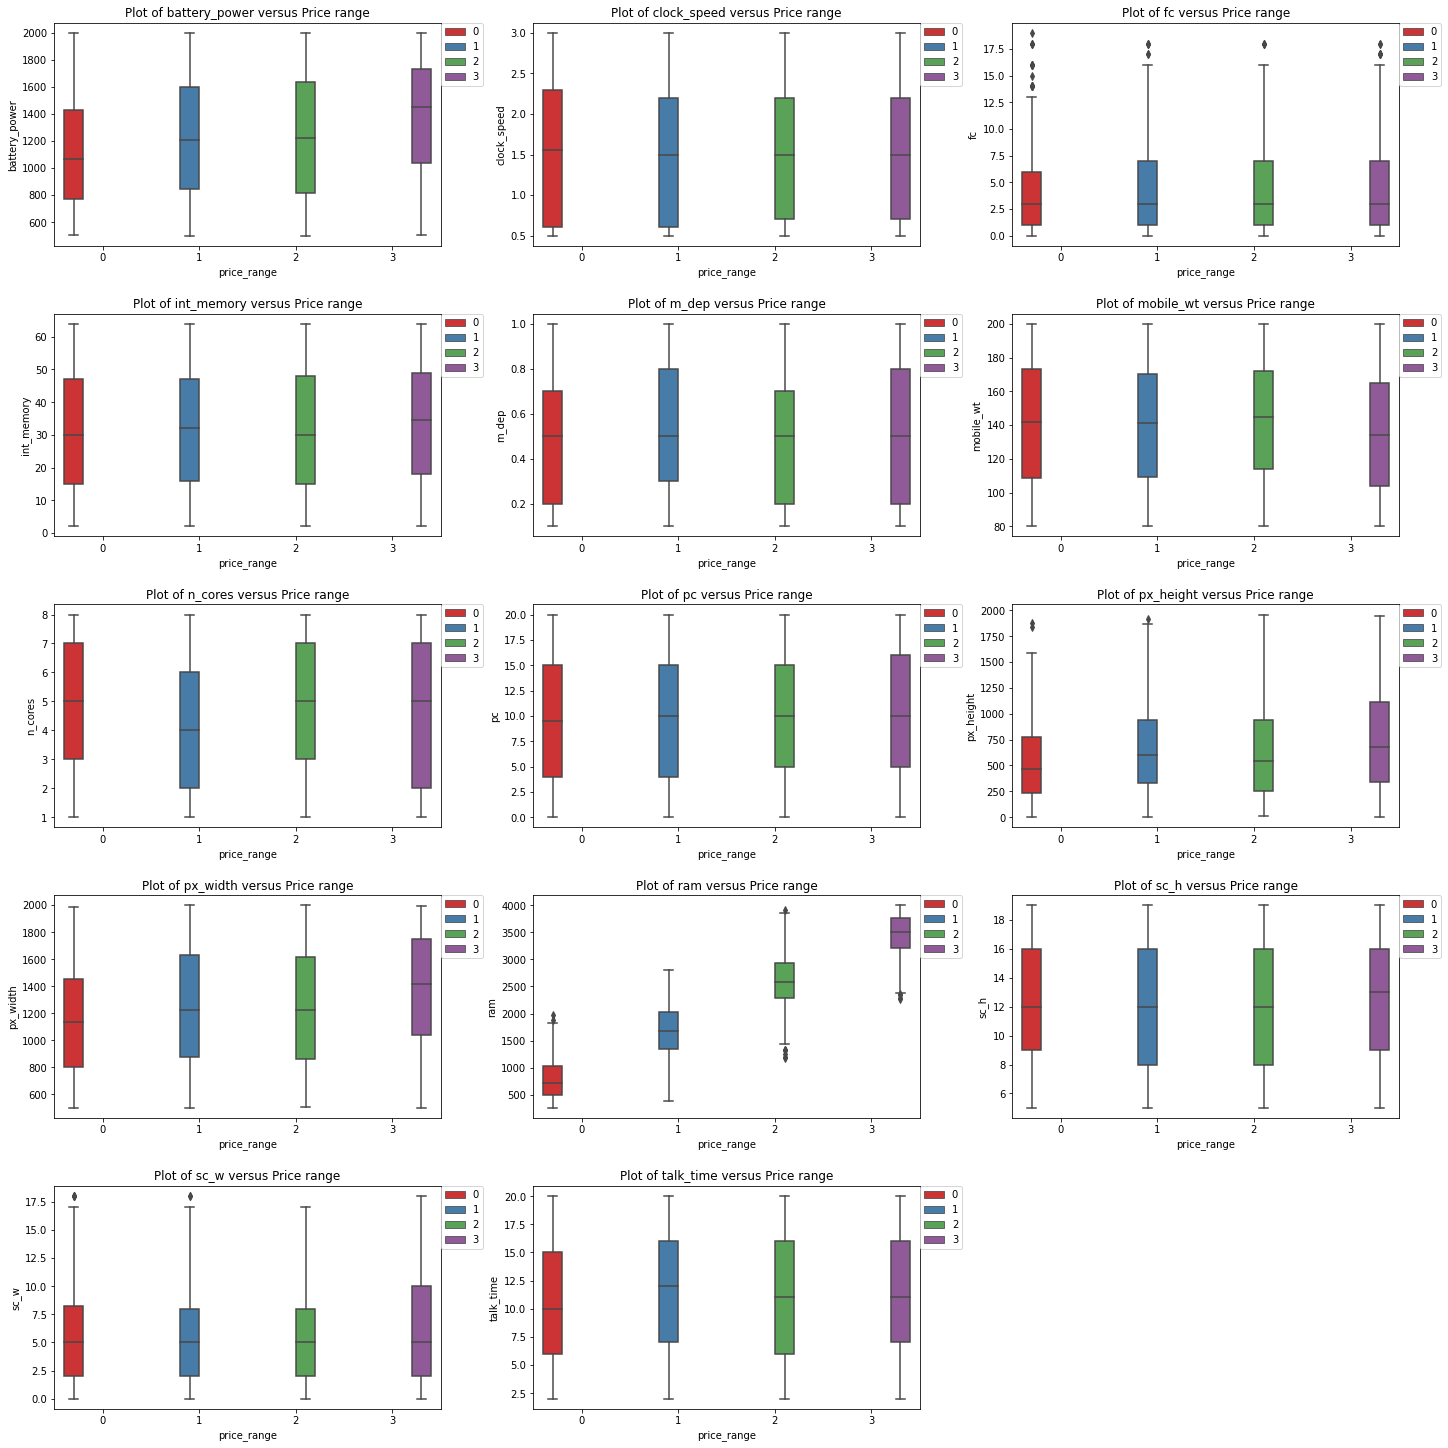

In [ ]:
fig = plt.figure(figsize=(20,20))
c=1
for i in numerical_columns :
    plt.subplot(5,3, c)
    sns.boxplot(x='price_range',y=i,data=df,hue='price_range',palette='Set1')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
    plt.title(f'Plot of {i} versus Price range')
    c = c + 1
plt.tight_layout(pad=0.3, w_pad=0.3, h_pad=2.0)
  

* Higher priced phones have higher RAM and higher battery power

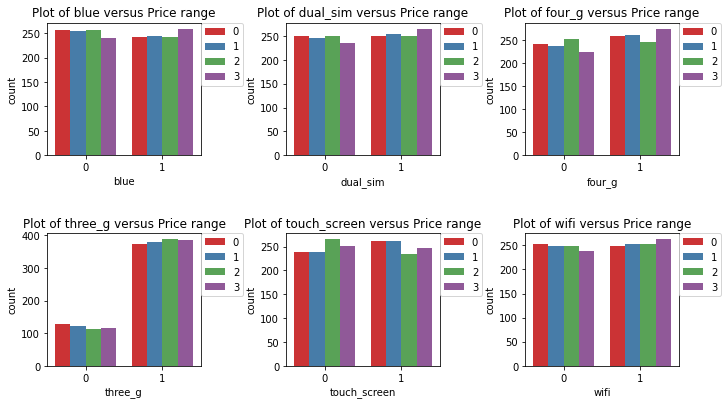

In [ ]:
fig = plt.figure(figsize=(10,8))
c=1
for i in ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'] :
    plt.subplot(3,3, c)
    sns.countplot(x=i,data=df,hue='price_range',palette='Set1')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
    plt.title(f'Plot of {i} versus Price range')
    c = c + 1
plt.tight_layout(pad=0.3, w_pad=0.3, h_pad=3.0)

# ***Feature engineering***






In [ ]:
# making a copy of our dataset
df_1 = df.copy()



> ### **Treating incorrect values**



In [ ]:
# replacing sc_w values equal to zero with it's median.
df_1['sc_w'].replace(0, df_1['sc_w'].median(), inplace=True)

In [ ]:
# replacing px_height values equal to zero with it's median.
df_1['px_height'].replace(0, df_1['px_height'].median(), inplace=True)





> ### **Feature Extraction & Feature Selection**






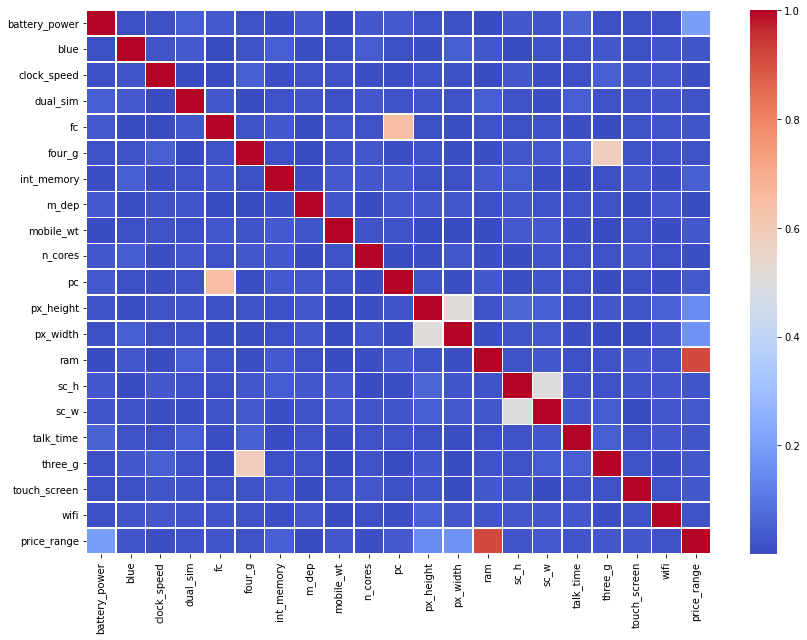

In [ ]:
# Correlation heatmap 
plt.figure(figsize=[14,10])
sns.heatmap(data=abs(df_1.corr()), annot=False, cmap='coolwarm', linewidths=0.5)

The features : battery_power, px_height, px_width, and ram, all have correlations with the dependent variable price_range.



> ### **Checking Multicollinearity**



In [ ]:
# calculating vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
def check_vif(dataframe):
  # the independent variables set
  X = dataframe
  # VIF dataframe
  vif_data = pd.DataFrame()
  vif_data["feature"] = X.columns
    
  # calculating VIF for each feature
  vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]
  print(vif_data)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
check_vif(df_1[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']])

          feature        VIF
0   battery_power   8.073908
1            blue   1.982736
2     clock_speed   4.261359
3        dual_sim   2.014356
4              fc   3.412883
5          four_g   3.193731
6      int_memory   3.960540
7           m_dep   3.910499
8       mobile_wt  12.969326
9         n_cores   4.647420
10             pc   6.222849
11      px_height   4.280154
12       px_width  11.792757
13            ram   4.688630
14           sc_h  11.675539
15           sc_w   4.650102
16      talk_time   4.857407
17        three_g   6.195323
18   touch_screen   1.988861
19           wifi   2.020265


Features like mobile_wt,px_width,sc_h have VIF values above the acceptable range.

In [ ]:
#Extracting new feature 'screen_area' and 'ppi'
df_1['screen_area'] =df_1['sc_h'] * df_1['sc_w']

# df_1['Screen_area_inch']=df_1['screen_area']/(2.54*2.54)
# df_1['ppi']=(df['px_width']*df['px_height'])/df_1['Screen_area_inch']

In [ ]:
check_vif(df_1[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory','mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time',
       'three_g', 'touch_screen', 'wifi',
       'screen_area','px_width','px_height']])

          feature        VIF
0   battery_power   7.913731
1            blue   1.977947
2     clock_speed   4.243063
3        dual_sim   2.010425
4              fc   3.409754
5          four_g   3.192267
6      int_memory   3.897401
7       mobile_wt  12.370727
8         n_cores   4.603392
9              pc   6.167611
10            ram   4.655843
11      talk_time   4.812244
12        three_g   6.172743
13   touch_screen   1.986288
14           wifi   2.016051
15    screen_area   2.313155
16       px_width  11.634544
17      px_height   4.273459


*There is a decrease in **VIF** scores of some features now.We cannot transform any further as all features seem important.*

In [ ]:
#Dropping the columns sc_h and sc_w
df_1.drop([ 'sc_h', 'sc_w'], axis=1, inplace=True)

In [ ]:
# seperating independent and dependent variables
X = df_1.drop(['price_range'],axis=1)
y = df_1['price_range']

In [ ]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)  

### **SelectKBest**

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2

In [ ]:
best_features = SelectKBest(chi2,k=15)
kbest= best_features.fit(X_train,y_train)

In [ ]:
scores = pd.DataFrame(kbest.scores_)
features = pd.DataFrame(X_train.columns)

In [ ]:
# concat both dataframes for comparing best scores

score_list = pd.concat([features,scores],axis=1)
score_list.columns = ["features","scores"]
score_list

,features,scores
0,battery_power,10766.180983
1,blue,1.281495
2,clock_speed,0.061901
3,dual_sim,0.741418
4,fc,7.900221
5,four_g,1.640368
6,int_memory,98.958062
7,m_dep,0.444022
8,mobile_wt,95.306241
9,n_cores,12.450863


In [ ]:
#Top 10 Features with highest scores
print(score_list.nlargest(10,"scores"))

         features         scores
13            ram  684408.089220
11      px_height   12902.545931
0   battery_power   10766.180983
12       px_width    7092.492820
18    screen_area     164.113655
6      int_memory      98.958062
8       mobile_wt      95.306241
9         n_cores      12.450863
4              fc       7.900221
14      talk_time       7.776796




###**Random Forest Classifier**


* *Creating a baseline model for Random Forest Classifier*

In [ ]:
#Fitting the RFR classifier with default parameters to the training set  
from sklearn.ensemble import RandomForestClassifier  
rfr= RandomForestClassifier(random_state=0)  
rfr.fit(X_train, y_train) 

RandomForestClassifier(random_state=0)

In [ ]:
# prediction for training set
y_pred_train = rfr.predict(X_train)
#Predicting the test set result  
y_pred_test= rfr.predict(X_test)  

In [ ]:
def classification_performance(y_,y_pred):
  '''
  This function prints the accuracy score,confusion matrix and classification report of model
  The inputs to this model are the actual values of the target variable 'y' and the predicted value 'y_pred'
  '''
  from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
  #accuracy
  print("Accuracy score is {}".format(accuracy_score(y_, y_pred)))
  #confusion matrix and classification report for the test/train set
  print("-"*60)
  print("Confusion matrix")
  print(confusion_matrix(y_, y_pred))
  print("-"*60)
  print('Classification report')
  print(classification_report(y_, y_pred,digits=3))

In [ ]:
# Accuracy score,confusion matrix and classification report for training set
print('Evaluating the performance on Training data')
classification_performance(y_train,y_pred_train)

Evaluating the performance on Training data
Accuracy score is 1.0
------------------------------------------------------------
Confusion matrix
[[376   0   0   0]
 [  0 390   0   0]
 [  0   0 375   0]
 [  0   0   0 359]]
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       376
           1      1.000     1.000     1.000       390
           2      1.000     1.000     1.000       375
           3      1.000     1.000     1.000       359

    accuracy                          1.000      1500
   macro avg      1.000     1.000     1.000      1500
weighted avg      1.000     1.000     1.000      1500



In [ ]:
# Accuracy score,confusion matrix and classification report for testing set
print('Evaluating the performance on Test data')
classification_performance(y_test,y_pred_test)

Evaluating the performance on Test data
Accuracy score is 0.876
------------------------------------------------------------
Confusion matrix
[[122   2   0   0]
 [ 10  89  11   0]
 [  0  16  98  11]
 [  0   0  12 129]]
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      0.924     0.984     0.953       124
           1      0.832     0.809     0.820       110
           2      0.810     0.784     0.797       125
           3      0.921     0.915     0.918       141

    accuracy                          0.876       500
   macro avg      0.872     0.873     0.872       500
weighted avg      0.875     0.876     0.875       500



In [ ]:
# making function to plot model's feature importance
def plotting_imp_features(model, training_data):
  imp_features = model.feature_importances_
  feature_names = training_data.columns
  _imp_features = pd.Series(imp_features, index=feature_names)
  df=pd.DataFrame({'Features':feature_names,'Importance':imp_features})
  df=df.sort_values(by='Importance',ascending=False).head(10)
  sns.barplot(x='Importance',y='Features',data=df,color='b')

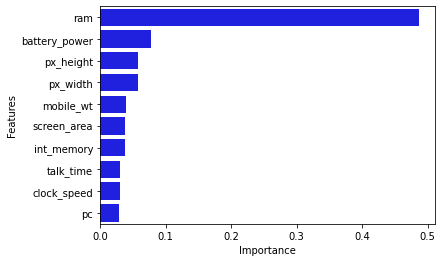

In [ ]:
plotting_imp_features(rfr, X_train)

In [ ]:
# seperating independent and dependent variables
X_train= X_train[['battery_power','fc','int_memory','mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time','screen_area','clock_speed','px_width','px_height']]
X_test= X_test[['battery_power','fc','int_memory','mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time','screen_area','clock_speed','px_width','px_height']]

In [ ]:
#creating list of numerical and categorical columns from the selected features
selected_numerical_columns=[]
for col in X_train.columns:
  if X_train[col].nunique()>5:
    selected_numerical_columns.append(col)
selected_categorical_columns=list(set(X_train.columns)-set(numerical_columns))

In [ ]:
print(selected_numerical_columns)
print(selected_categorical_columns)

['battery_power', 'fc', 'int_memory', 'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time', 'screen_area', 'clock_speed', 'px_width', 'px_height']
[]


In [ ]:
#Feature Scaling  
from sklearn.preprocessing import MinMaxScaler    
min_max_scale= MinMaxScaler()
X_train[selected_numerical_columns]= min_max_scale.fit_transform(X_train[selected_numerical_columns])    
X_test[selected_numerical_columns]= min_max_scale.transform(X_test[selected_numerical_columns])  

# ***K Nearest Neighbors Classifier***

* Untuned KNN Classifier

In [ ]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier( )  
knn.fit(X_train, y_train)  

KNeighborsClassifier()

In [ ]:
# prediction for training set
y_pred_train = knn.predict(X_train)

In [ ]:
# prediction fot testing set
y_pred_test =knn.predict(X_test)

In [ ]:
# Accuracy score,confusion matrix and classification report for training set
classification_performance(y_train,y_pred_train)

Accuracy score is 0.7686666666666667
------------------------------------------------------------
Confusion matrix
[[332  43   1   0]
 [ 68 290  31   1]
 [  2  94 255  24]
 [  0  11  72 276]]
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      0.826     0.883     0.853       376
           1      0.662     0.744     0.700       390
           2      0.710     0.680     0.695       375
           3      0.917     0.769     0.836       359

    accuracy                          0.769      1500
   macro avg      0.779     0.769     0.771      1500
weighted avg      0.776     0.769     0.770      1500



In [ ]:
# Accuracy score,confusion matrix and classification report for testing set
classification_performance(y_test,y_pred_test)

Accuracy score is 0.628
------------------------------------------------------------
Confusion matrix
[[103  19   2   0]
 [ 32  61  17   0]
 [  1  50  62  12]
 [  0   3  50  88]]
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      0.757     0.831     0.792       124
           1      0.459     0.555     0.502       110
           2      0.473     0.496     0.484       125
           3      0.880     0.624     0.730       141

    accuracy                          0.628       500
   macro avg      0.642     0.626     0.627       500
weighted avg      0.655     0.628     0.634       500



 * *KNN classifier with hyperparameter tuning*

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
#Hyperparameter tuning with GridSearchCV for knn
knn = KNeighborsClassifier(algorithm='auto')
parameters_grid = { 'n_neighbors': list(range(1,50)),'leaf_size': list(range(20,50)),'p': (1,2),'weights': ('uniform', 'distance')}        
         
# Performing 3-fold Grid Search Cross-validation on the knn model
knn_cv = GridSearchCV(estimator=knn,param_grid=parameters_grid,scoring = 'accuracy',n_jobs = -1,cv = 3)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                                       30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
                                       40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'p': (1, 2), 'weights': ('uniform', 'distance')},
             scoring='accuracy')

In [ ]:
#The hyperparameters of the best knn model
print(f'The optimal value for hyperparameters are : {knn_cv.best_params_} \n')

The optimal value for hyperparameters are : {'leaf_size': 20, 'n_neighbors': 43, 'p': 1, 'weights': 'distance'} 



In [ ]:
best_knn=knn_cv.best_estimator_
best_knn.fit(X_train, y_train)  

KNeighborsClassifier(leaf_size=20, n_neighbors=43, p=1, weights='distance')

In [ ]:
# prediction for training set
y_pred_train = best_knn.predict(X_train)
# prediction fot testing set
y_pred_test =best_knn.predict(X_test)

In [ ]:
# Accuracy score,confusion matrix and classification report for training set
classification_performance(y_train,y_pred_train)

Accuracy score is 1.0
------------------------------------------------------------
Confusion matrix
[[376   0   0   0]
 [  0 390   0   0]
 [  0   0 375   0]
 [  0   0   0 359]]
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       376
           1      1.000     1.000     1.000       390
           2      1.000     1.000     1.000       375
           3      1.000     1.000     1.000       359

    accuracy                          1.000      1500
   macro avg      1.000     1.000     1.000      1500
weighted avg      1.000     1.000     1.000      1500



In [ ]:
# Accuracy score,confusion matrix and classification report for testing set
print('Evaluating the performance on Test data')
classification_performance(y_test,y_pred_test)

Evaluating the performance on Test data
Accuracy score is 0.792
------------------------------------------------------------
Confusion matrix
[[113  11   0   0]
 [ 18  76  16   0]
 [  0  23  95   7]
 [  0   0  29 112]]
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      0.863     0.911     0.886       124
           1      0.691     0.691     0.691       110
           2      0.679     0.760     0.717       125
           3      0.941     0.794     0.862       141

    accuracy                          0.792       500
   macro avg      0.793     0.789     0.789       500
weighted avg      0.801     0.792     0.794       500



# ***Random Forest Classifier***

* *Tuned Random Forest Classifier*

In [ ]:
#performing GridSearch Cross Validaton to find the optimal values of hyperparameters
rfr=RandomForestClassifier( )  
parameters_grid={'n_estimators' :[100, 300, 500],'max_depth' : [5, 8, 15, 25, 30],'min_samples_split' : [2, 5, 10, 15, 100],'min_samples_leaf': [1, 2, 5, 10]}
rfr_cv = GridSearchCV(rfr, param_grid=parameters_grid, cv = 3, verbose = 1, n_jobs = -1,scoring='accuracy')
rfr_cv.fit(X_train, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 8, 15, 25, 30],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy', verbose=1)

In [ ]:
print(f'The optimal value for hyperparameters for Random Forest Classifier are : {rfr_cv.best_params_} ')

The optimal value for hyperparameters for Random Forest Classifier are : {'max_depth': 25, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500} 


In [ ]:
best_rfr=rfr_cv.best_estimator_
best_rfr.fit(X_train, y_train)  

RandomForestClassifier(max_depth=25, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=500)

In [ ]:
# prediction for training set
y_pred_train = best_rfr.predict(X_train)
# prediction fot testing set
y_pred_test =best_rfr.predict(X_test)

In [ ]:
# Accuracy score,confusion matrix and classification report for testing set
print('Evaluating the performance on Test data')
classification_performance(y_test,y_pred_test)

Evaluating the performance on Test data
Accuracy score is 0.896
------------------------------------------------------------
Confusion matrix
[[123   1   0   0]
 [  6  93  11   0]
 [  0  14 100  11]
 [  0   0   9 132]]
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      0.953     0.992     0.972       124
           1      0.861     0.845     0.853       110
           2      0.833     0.800     0.816       125
           3      0.923     0.936     0.930       141

    accuracy                          0.896       500
   macro avg      0.893     0.893     0.893       500
weighted avg      0.895     0.896     0.895       500



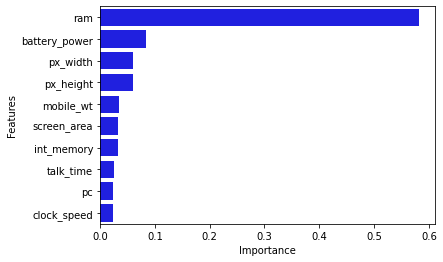

In [ ]:
# making function to plot the best Random forest classifier model's feature importance
plotting_imp_features(best_rfr, X_train)
